<h1>Module 5: Model Evaluation and Refinement</h1>

We have built models and made predictions of vehicle prices. Now we will determine how accurate these predictions are. 

<h1>Table of content</h1>
<ul>
    <li><a href="#ref1">Model Evaluation </a></li>
    <li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
    <li><a href="#ref3">Ridge Regression </a></li>
    <li><a href="#ref4">Grid Search</a></li>
</ul>

This dataset was hosted on IBM Cloud object click <a href="https://cocl.us/DA101EN_object_storage">HERE</a> for free storage.

In [151]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [152]:
df.to_csv('module_5_auto.csv')

 First lets only use numeric data 

In [153]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


 Libraries for plotting 

In [154]:
%%capture
! pip install ipywidgets

In [155]:
from IPython.display import display
from IPython.html import widgets 
from ipywidgets import interact, interactive, fixed, interact_manual

<h2>Functions for plotting</h2>

In [156]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [157]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Part 1: Training and Testing</h1>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y</b>:</p>

In [158]:
y_data = df['price']

drop price data in x data

In [159]:
x_data=df.drop('price',axis=1)

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [160]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
print("number of test samples :", y_test.shape[0])
print("number of training samples:",y_train.shape[0])

number of test samples : 31
number of training samples: 170
number of test samples : 31
number of training samples: 170


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset. 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train_1" , "x_test_1", "y_train_1" and  "y_test_1".</b>
</div>

In [161]:
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.

In [162]:
from sklearn.linear_model import LinearRegression

 We create a Linear Regression object:

In [163]:
lre=LinearRegression()

we fit the model using the feature horsepower 

In [164]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's Calculate the R^2 on the test data:

In [165]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

we can see the R^2 is much smaller using the test data.

In [166]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 90% of the data for training data
</b>
</div>

In [167]:
# Write your code below and press Shift+Enter to execute 
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.10, random_state=0)
lre.fit(x_train2[['horsepower']],y_train2)
lre.score(x_test2[['horsepower']],y_test2)

0.7340722810055448

 Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for  Cross-validation. 

<h2>Cross-validation Score</h2>

Lets import <b>model_selection</b> from the module <b>cross_val_score</b>.

In [168]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 

In [169]:
Rcross=cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2; each element in the array has the average  R^2 value in the fold:

In [170]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

 We can calculate the average and standard deviation of our estimate:

In [171]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'. 

In [172]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature : 
</b>
</div>

In [173]:
# Write your code below and press Shift+Enter to execute 
Rcross2 =cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rcross2.mean()

0.5166761697127429

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the function:

In [174]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature in this case <b>'horsepower'</b> , the target data <b>y_data</b>. The parameter 'cv' determines the number of folds; in this case 4. We can produce an output:

In [175]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

Let's create Multiple linear regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.

In [176]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Prediction using training data:

In [177]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

Prediction using test data: 

In [178]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

yhat

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598, 13986.46002486, 13986.46002486, 13986.46002486,
       18641.80153159, 12589.85757284, 12589.85757284, 15693.41857732,
       15693.41857732, 15693.41857732, 25159.27964101, 25159.27964101,
       25159.27964101,  4365.42091095,  7779.33801589,  7779.33801589,
        7468.98191544,  7468.98191544, 12745.03562306,  7468.98191544,
        7468.98191544,  7468.98191544, 12745.03562306, 10572.54291992,
       19417.69178271,  5917.2014132 ,  8710.40631723,  6227.55751364,
        8710.40631723,  8710.40631723,  8710.40631723,  8710.40631723,
       10262.18681948, 10262.18681948, 10262.18681948, 10262.18681948,
       12589.85757284, 12434.67952262,  9020.76241768, 10882.89902037,
       24228.21133966, 24228.21133966, 37573.52365895,  7468.98191544,
        7468.98191544,  7468.98191544,  7468.98191544,  7191.77534249,
       12625.21956696, 12625.21956696, 12625.21956696, 18223.31361641,
      

Let's perform some model evaluation using our training and testing data separately. First  we import the seaborn and matplotlibb library for plotting.

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.

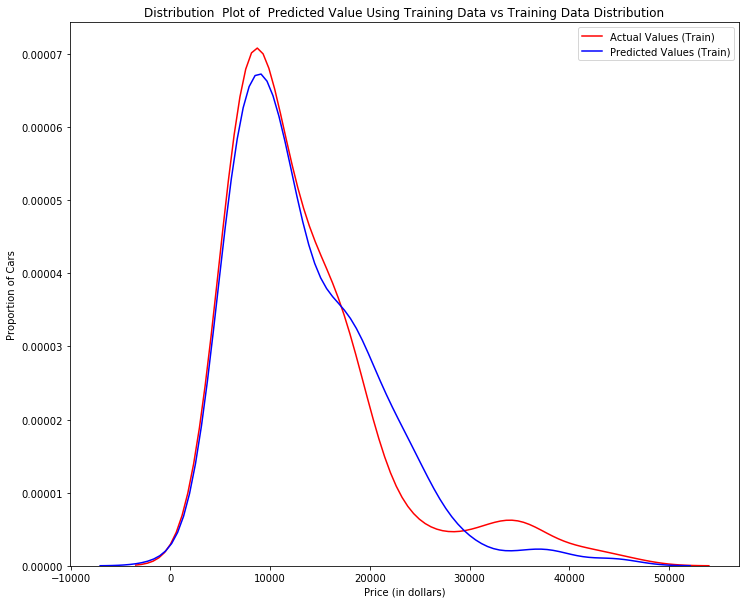

In [180]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 

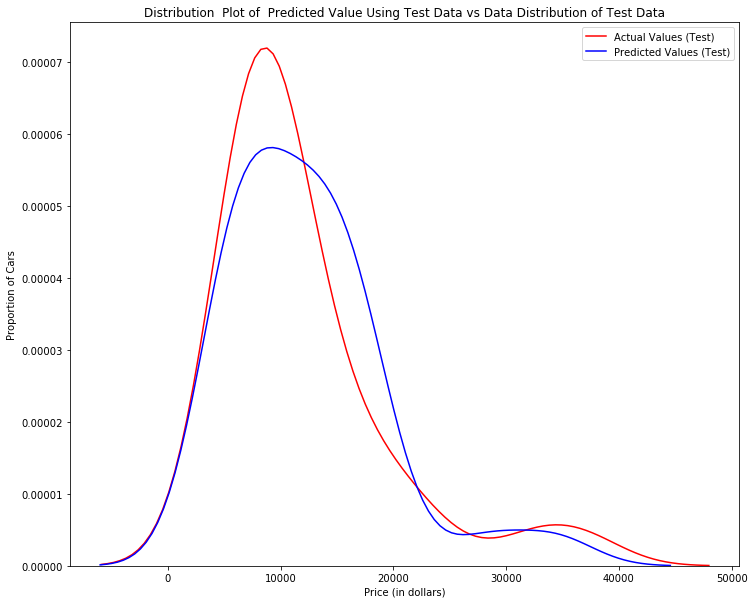

In [182]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figur 2: Plot of predicted value using the test data compared to the test data. 

<p>Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>

In [183]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

Let's use 55 percent of the data for testing and the rest for training:

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.55, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horse power'</b>. 

In [185]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.transform(x_test[['horsepower']])

Now let's create a linear regression model "poly" and train it.

In [186]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can see the output of our model using the method  "predict." then assign the values to "yhat".

In [187]:
yhat = poly.predict(x_test_pr)
yhat

array([   6441.63149709,    7052.89040859,   12145.78578642,
         18348.86580864,   19587.72708626,   10017.73766308,
         13855.95490843,    5664.75417402,   14316.03356325,
          6441.63149709,    9771.76476675,   17037.26002524,
          8088.09618818,    6492.66163535,   16626.20359853,
         13855.95490843,    7755.28047196,   13855.95490843,
         10259.36704503,    6109.23329137,    6109.23329137,
         13914.36045139,   27209.88736941,    6441.63149709,
          5701.45044438,   17037.26002524,   10017.73766308,
         11169.57168312,   16240.1277742 ,   27209.88736941,
         29000.19333876,   15126.45733288,    5664.75417402,
         12145.78578642,   13162.54584366,   10726.88398837,
         13855.95490843,   14104.12471105,   10726.88398837,
         12478.73798802,    6266.58468583,   14385.69586975,
         13162.54584366,   12145.78578642,   14143.18068394,
          6836.69142546,   15745.45102236,    6109.23329137,
          6109.23329137,

Let's take the first five predicted values and compare it to the actual targets. 

In [188]:
print("Predicted values:", yhat)
print("True values:", y_test.values)

Predicted values: [   6441.63149709    7052.89040859   12145.78578642   18348.86580864
   19587.72708626   10017.73766308   13855.95490843    5664.75417402
   14316.03356325    6441.63149709    9771.76476675   17037.26002524
    8088.09618818    6492.66163535   16626.20359853   13855.95490843
    7755.28047196   13855.95490843   10259.36704503    6109.23329137
    6109.23329137   13914.36045139   27209.88736941    6441.63149709
    5701.45044438   17037.26002524   10017.73766308   11169.57168312
   16240.1277742    27209.88736941   29000.19333876   15126.45733288
    5664.75417402   12145.78578642   13162.54584366   10726.88398837
   13855.95490843   14104.12471105   10726.88398837   12478.73798802
    6266.58468583   14385.69586975   13162.54584366   12145.78578642
   14143.18068394    6836.69142546   15745.45102236    6109.23329137
    6109.23329137   11966.64194725   29400.95360051   17037.26002524
   12914.22231977   12478.73798802    5664.75417402    6109.23329137
    7755.2804719

We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

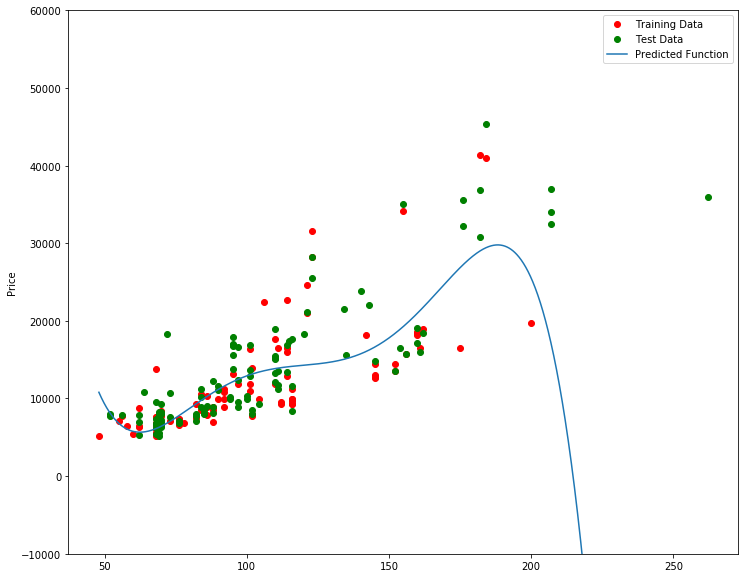

In [189]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

 R^2 of the training data:

In [190]:
poly.score(x_train_pr, y_train)

0.5682646621503102

 R^2 of the test data:

In [191]:
poly.score(x_test_pr, y_test)
print(x_test_pr)

[[1.00000000e+00 7.00000000e+01 4.90000000e+03 3.43000000e+05
  2.40100000e+07 1.68070000e+09]
 [1.00000000e+00 7.30000000e+01 5.32900000e+03 3.89017000e+05
  2.83982410e+07 2.07307159e+09]
 [1.00000000e+00 9.50000000e+01 9.02500000e+03 8.57375000e+05
  8.14506250e+07 7.73780938e+09]
 [1.00000000e+00 1.52000000e+02 2.31040000e+04 3.51180800e+06
  5.33794816e+08 8.11368120e+10]
 [1.00000000e+00 1.56000000e+02 2.43360000e+04 3.79641600e+06
  5.92240896e+08 9.23895798e+10]
 [1.00000000e+00 8.50000000e+01 7.22500000e+03 6.14125000e+05
  5.22006250e+07 4.43705312e+09]
 [1.00000000e+00 1.10000000e+02 1.21000000e+04 1.33100000e+06
  1.46410000e+08 1.61051000e+10]
 [1.00000000e+00 6.20000000e+01 3.84400000e+03 2.38328000e+05
  1.47763360e+07 9.16132832e+08]
 [1.00000000e+00 1.21000000e+02 1.46410000e+04 1.77156100e+06
  2.14358881e+08 2.59374246e+10]
 [1.00000000e+00 7.00000000e+01 4.90000000e+03 3.43000000e+05
  2.40100000e+07 1.68070000e+09]
 [1.00000000e+00 8.40000000e+01 7.05600000e+03 5.9

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

R2 Values for Orders 1, 2, 3, 4: [0.6978054644408849, 0.7076382887305913, 0.7021906402432648, 0.49593604809744096]


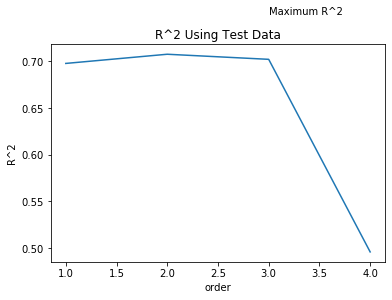

In [192]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

print("R2 Values for Orders 1, 2, 3, 4:", Rsqu_test)

We see the R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.

The following function will be used in the next section; please run the cell.

In [194]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data. 

In [195]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two?</b>
</div>

In [196]:
pr1=PolynomialFeatures(degree=2)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

pr1=PolynomialFeatures(degree=2)

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform" 
?</b>
</div>

In [198]:
x_train_pr=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

Double-click <b>here</b> for the solution.

<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->

<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape"
</b>
</div>

In [199]:
x_train_pr.shape

(90, 15)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

There are now 15 features: x_train_pr1.shape 

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features?</b>
</div>

In [200]:
poly1=LinearRegression()
poly1.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

poly1=linear_model.LinearRegression().fit(x_train_pr1,y_train)

-->

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot"  to display the distribution of the predicted output vs the test data?</b>
</div>

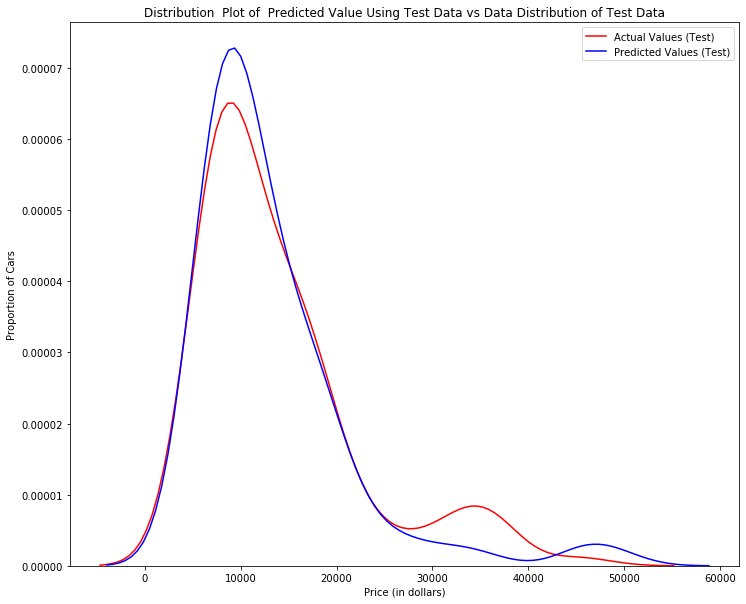

In [201]:
yhat= poly1.predict(x_test_pr)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", Title)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Use the distribution plot to determine the two regions were the predicted prices are less accurate than the actual prices.</b>
</div>

Double-click <b>here</b> for the solution.

<!-- The answer is below:

The predicted value is lower than actual value for cars where the price  $ 10,000 range, conversely the predicted price is larger than the price cost in the $30, 000 to $40,000 range. As such the model is not as accurate in these ranges .
    
-->

<img src = "https://ibm.box.com/shared/static/c35ipv9zeanu7ynsnppb8gjo2re5ugeg.png" width = 700, align = "center">


<h2 id="ref3">Part 3: Ridge regression</h2> 

 In this section, we will review Ridge Regression we will see how the parameter Alfa changes the model. Just a note here our test data will be used as validation data.

 Let's perform a degree two polynomial transformation on our data. 

In [202]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

 Let's import  <b>Ridge</b>  from the module <b>linear models</b>.

In [203]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter to 0.1 

In [205]:
RigeModel=Ridge(alpha=0.1)

Like regular regression, you can fit the model using the method <b>fit</b>.

In [206]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

 Similarly, you can obtain a prediction: 

In [ ]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set 

In [209]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6468.54462499 10156.3257448  19845.75606762 18851.20227226]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of Alfa that minimizes the test error, for example, we can use a for loop. 

In [223]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

We can plot out the value of R^2 for different Alphas 

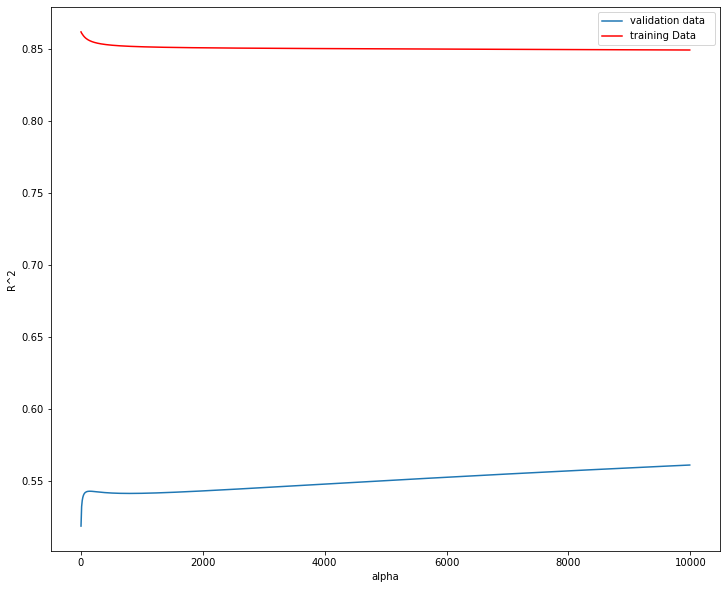

In [211]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figure 6:The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa 

The red line in figure 6 represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. The parameter alpha should be set to  10.
</div>

In [251]:
# Write your code below and press Shift+Enter to execute 
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)
yhat1 = RigeModel.predict (x_test_pr)

print("Predicted Values:", yhat1 [0:5], "Actual Test Values:", y_test [0:5].values, \
      "R2 of this is:",RigeModel.score (x_test_pr, y_test))

Predicted Values: [ 6366.87248464  9855.95189584 18715.78322701 20327.60212583
 21188.96036226] Actual Test Values: [ 6295. 10698. 13860. 13499. 15750.] R2 of this is: 0.5324456428345778


Double-click <b>here</b> for the solution.

<!-- The answer is below:

RigeModel = Ridge(alpha=0) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

-->

<h2 id="ref4">Part 4: Grid Search</h2>

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.

In [252]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:

In [256]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a ridge regions object:

In [257]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Create a ridge grid search object 

In [258]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model 

In [259]:
P=x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
F=y_data

Grid1.fit(P,F)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [260]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

 We now test our model on the test data 

In [261]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8387851308772891

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6): </h1>
Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters
</div>

In [265]:
# Write your code below and press Shift+Enter to execute 
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000],'normalize':[True,False]}]
Grid2=GridSearchCV(RR, parameters2,cv=4)
Grid2.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)
Grid2.best_estimator_

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

-->

<h1>Thank you for completing this notebook!</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">

    <p><a href="https://cocl.us/corsera_da0101en_notebook_bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/BottomAd.png" width="750" align="center"></a></p>
</div>


<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and <a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a> and <a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a> is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.</p>

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>